#**Title: E-commerce Product Recommendation System using Machine Learning Techniques**
The problem statement is that it is difficult for e-commerce websites to recommend products that users are likely to be interested in. This is because there is a lot of data to consider, such as the user's search history, purchase history, browsing history, and demographic information.

The significance of the project is that it can help e-commerce websites increase sales by recommending products that users are likely to buy. This can also help to improve the user experience by making it easier for users to find the products they are looking for.

The dataset used is the [Amazon product reviews dataset (Content Based)](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) and [E-commerce Rating Dataset (Collaborative Filtering)](https://www.kaggle.com/datasets/trnduythanhkhttt/uelstoredataset). This dataset contains information 'Product ID' ,'Product Name', 'Category', 'Current price' ,'Overall Rating', 'About product' , 'Total Rating' and  other information’s regarding a product. It is a valuable resource for training machine learning models for product recommendation.

The proposed approach is to use a Content Based and Collaborative Filtering algorithm to recommend products to users. A content-based recommendation algorithm is a type of recommendation system that recommends items to users based on the content of those items. This type of algorithm is often used for e-commerce websites, where it can be used to recommend products to users based on their past purchases and browsing history. While Collaborative filtering algorithms work by finding users who have similar interests to the current user and then recommending products that those users have bought.

The expected results are that the product recommendation system will be able to recommend products that users are likely to be interested in. This will help to increase sales and improve the user experience.


# **Content Based Model**

Demo: [Content Based link](https://cse366.onrender.com/)


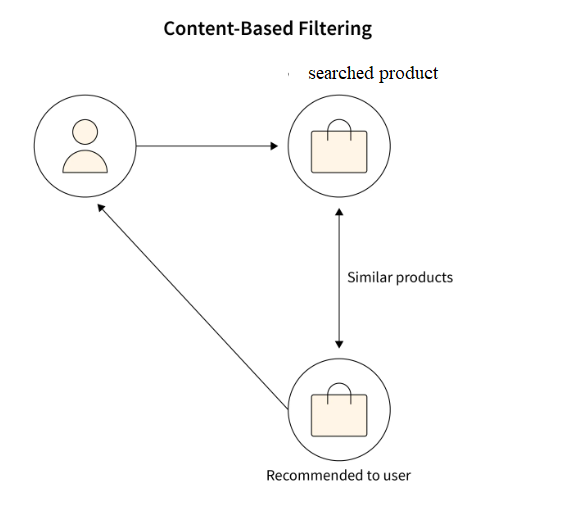

## **Problem Statement**
The problem we are addressing is that it is difficult for users to find products that they are interested in on e-commerce websites. This is because there is a vast amount of data to consider, such as the user's purchase history, browsing history, and demographic information.

The problem is important because it can lead to users not finding the products they are looking for, which can decrease sales for e-commerce websites. It can also lead to users being frustrated with the search process, which can decrease the user experience.

The goals of my machine learning project are to:
*	Recommend products to users that they are likely to be interested in.
*	Improve the user experience on e-commerce websites.
*	Increase sales for e-commerce websites.

The objectives of my machine learning project are to:
*	Collect a dataset of products and user data.
*	Extract features from the data.
*	Train a machine learning model.
*	Evaluate the model.
* Deploy the model.

we will use content-based and collaborative filtering algorithms on different two datasets recommendation algorithms to recommend products to users. Content-based recommendation algorithms work by finding products that are like products that the user has liked in the past and collaborative filtering helps to find the product based on the user's rating.

We expect that my model will be able to recommend products that users will likely be interested in. This will help to increase sales and improve the user experience.


In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy.lib.function_base import vectorize

vectorizer = TfidfVectorizer()

##**Data Collection and Preprocessing**
**Datasets:** [Amazon product reviews dataset (Content Based)](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) and [E-commerce Rating Dataset (Collaborative Filtering)](https://www.kaggle.com/datasets/trnduythanhkhttt/uelstoredataset)

Content Based Model: Amazon product reviews dataset
This dataset contains a total of 1351 unique products of amazon.in ecommerce website.


---

**Both data were collected from Kaggle. These are valuable resources for training machine learning models for product recommendation. **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data source
product_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/amazon_updated.csv')

From this dataset we took only these information 'Product ID', 'Product Name', 'Category', 'Current price' ,'Overall Rating', 'About product' , 'Total Rating' columns to build the product recommendation system based on content based model.

In [ ]:
#selecting columns
selected_col = ['product_id' ,'product_name', 'category', 'discounted_price' ,'rating', 'about_product' , 'rating_count']

Product Data: Cleaning and normalization of user and product information, such as handling missing values and standardizing categories. Then deleting all null fields from selected columns using
```
for col in selected_col:
  product_data[col] = product_data[col].fillna('')
```



In [ ]:
# deleting all null fields from selected colunms
for col in selected_col:
  product_data[col] = product_data[col].fillna('')

This dataset contains price with the Rupees value which was need to be removed from in order make the model working fine when user searching using a product with its price.
price.replace('₹', '') for price in partial_matches

In [ ]:
#fixing some price symbol issue
# update_matches = [price.replace('₹', '') for price in partial_matches]
# print(update_matches)

we need to convert all of the selected column text into in combined text form and this dataset contains only the overall rating of the product and total how many reviews was given to product.

In [ ]:
# making selected cols into a single string
combined_col = product_data['product_id']+ ' ' + product_data['product_name'] + ' ' + product_data['category'] + ' ' + product_data['discounted_price'].str.replace('₹', '') + ' ' + product_data['rating']+ ' ' + product_data['about_product'] + ' '+ product_data['rating_count']

In [ ]:
print(combined_col[0])

B07JW9H4J1 Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables 399 4.2 High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-inte

Text Vectorization of the selected columns.
 using vectorizer.fit_transform(combined_col)

In [ ]:
col_vectors = vectorizer.fit_transform(combined_col)

Finding the similar product (index, score) for each product using cosine similarity of the products

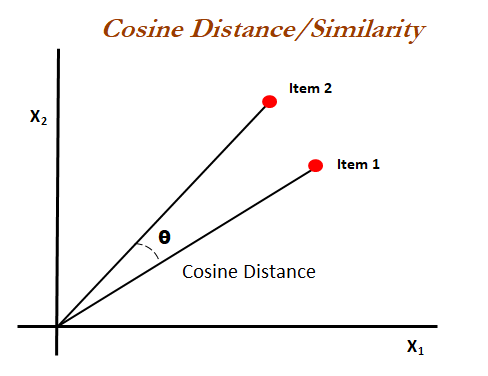

In [ ]:
# Finding the similar product (index, score) for each product
similar = cosine_similarity(col_vectors)

Taking user input for search

In [ ]:
#Taking the user input
product_search = input('Enter product Name or Price or Rating or Catagory or about product: ')

Enter product Name or Price or Rating or Catagory or about product: wave lite


In [ ]:
#comined cols
all_cols = list(combined_col)

Finding the close match to the searched product name, if the user with lower charecter it will also work. Here we are finding the partial_matches of searched product.

In [ ]:
# matched_product = difflib.get_close_matches(product_search, name_list)
partial_matches = list(set(product for product in combined_col if product_search in product.lower()))

print(partial_matches)

['B09V12K8NT boAt Wave Lite Smartwatch with 1.69" HD Display, Sleek Metal Body, HR & SpO2 Level Monitor, 140+ Watch Faces, Activity Tracker, Multiple Sports Modes, IP68 & 7 Days Battery Life(Active Black) Electronics|WearableTechnology|SmartWatches 1,499 3.9 Screen Size: The 1.69 inch HD full touch display with 500 nits of brightness will bring every detail to life!|Resolution: Get sharper color resolution that brightens your virtual world exponentially.|Slim Design: The ultra slim and lightweight design of the watch is ideal to keep you surfing your wave all day!|Sports Modes: Track your daily activity: calories burnt & steps taken. Choose from multiple sports modes which include Walking, Running, Cycling, Climbing, Yoga, Basketball, Football & many more|Google Fit & Apple Health: The watch supports Google and Apple Fit to seamlessly monitor your health.|IP Rating: Sweat freely while you work out with IP68 dust, sweat and splash resistance.|Watch Faces- Customize your style with 140+ 

closest match all most same to user input and we are taking the 1st one which one is the most closest.

In [ ]:
close_match = partial_matches[0] #taking the first value of the list

print(close_match)

B09V12K8NT boAt Wave Lite Smartwatch with 1.69" HD Display, Sleek Metal Body, HR & SpO2 Level Monitor, 140+ Watch Faces, Activity Tracker, Multiple Sports Modes, IP68 & 7 Days Battery Life(Active Black) Electronics|WearableTechnology|SmartWatches 1,499 3.9 Screen Size: The 1.69 inch HD full touch display with 500 nits of brightness will bring every detail to life!|Resolution: Get sharper color resolution that brightens your virtual world exponentially.|Slim Design: The ultra slim and lightweight design of the watch is ideal to keep you surfing your wave all day!|Sports Modes: Track your daily activity: calories burnt & steps taken. Choose from multiple sports modes which include Walking, Running, Cycling, Climbing, Yoga, Basketball, Football & many more|Google Fit & Apple Health: The watch supports Google and Apple Fit to seamlessly monitor your health.|IP Rating: Sweat freely while you work out with IP68 dust, sweat and splash resistance.|Watch Faces- Customize your style with 140+ ba

Finding the index of the product

In [ ]:
pid = close_match.split()[0]
index_of_the_product = product_data[product_data.product_id == pid]['index'].values[0]
# print(index_of_the_product)


In [ ]:
#similarity score
similarity_score = list(enumerate(similar[index_of_the_product]))

sorted similar product in reverse order based on the similarty scores



In [ ]:
#sorted similar product
sorted_product = sorted(similarity_score, key= lambda pro:pro[1], reverse=True)

Suggesting 10 products based on user search

In [ ]:
print("Product you may like: \n")

i = 1
for product in sorted_product:
  idx = product[0]
  name_of_product = product_data[product_data.index == idx]['product_name'].values[0]
  price = product_data.loc[idx, 'discounted_price']
  rating = product_data.loc[idx, 'rating']
  pid = product_data.loc[idx, 'product_id']

  if(i <= 10): #similar 10 product
    print(i, '(' , price, 'rating', rating,  pid, ')', '.', name_of_product)
    i+=1

Product you may like: 

1 ( ₹1,499 rating 3.9 B09V12K8NT ) . boAt Wave Lite Smartwatch with 1.69" HD Display, Sleek Metal Body, HR & SpO2 Level Monitor, 140+ Watch Faces, Activity Tracker, Multiple Sports Modes, IP68 & 7 Days Battery Life(Active Black)
2 ( ₹1,499 rating 3.9 B09V12K8NT ) . boAt Wave Lite Smartwatch with 1.69" HD Display, Sleek Metal Body, HR & SpO2 Level Monitor, 140+ Watch Faces, Activity Tracker, Multiple Sports Modes, IP68 & 7 Days Battery Life(Active Black)
3 ( ₹1,499 rating 3.9 B09V17S2BG ) . boAt Wave Lite Smartwatch with 1.69" HD Display, Heart Rate & SpO2 Level Monitor, Multiple Watch Faces, Activity Tracker, Multiple Sports Modes & IP68 (Deep Blue)
4 ( ₹1,499 rating 3.9 B09V175NP7 ) . boAt Wave Lite Smartwatch with 1.69 Inches(4.29cm) HD Display, Heart Rate & SpO2 Level Monitor, Multiple Watch Faces, Activity Tracker, Multiple Sports Modes & IP68 (Scarlet Red)
5 ( ₹1,799 rating 4 B0949SBKMP ) . boAt Flash Edition Smart Watch with Activity Tracker, Multiple Spor

## **Methodology**
We have implemented both available methods to build our product recommendations system using content based and collaborative filtering.
Content Based:
*	Cosine similarity is a measure of the similarity between two vectors. It is calculated by taking the dot product of the two vectors and dividing it by the product of their norms.
*	Cosine similarity is often used in content-based product recommendation systems because it is a simple and effective way to measure the similarity between products.
*	To use cosine similarity for product recommendation, the system first needs to create a vector representation of each product. This will be converting each product description into a vector of words. The words in the vector are weighted according to their frequency in the description.
*	Once the vectors for each product have been created, the system can calculate the cosine similarity between any two products. The products with the highest cosine similarity are then recommended to the user. The products that will be searched by the user, the searched product information will be checked in similar score index to find the similar product. This will give us 10 (can be changed) recommendations based on cosine similarity score.

**Collaborative filtering:**
Collaborative filtering is a technique used to recommend products to users based on the ratings or preferences of other users. The basic idea is that if two users have rated the same products similarly in the past, they are likely to also rate new products similarly.

For Collaborative filtering we used the cosine similarity score is a measure of the similarity between two vectors. It is calculated by taking the dot product of the two vectors and dividing it by the product of their norms. The cosine similarity of two vectors is high if they have similar values in the same dimensions. For more accuracy we took the users who at least rated > 200 products.

After that we have removed the user who have not rated much products, final filtered dataframe will contains the products which is rated by the rated user (at least rated 200 products). Now, we got the highest rated products, then we find the famous product which have at least 50 rating by the user and we get our famous products. Final rating dataframe contains the products details and the user who rated the product and the rating, converting the final rating data to pivot table x-axis will be have the customer id and y-axis will have the product name, pivot table contains the rating of a product from an unique user. Replacing the NaN value with 0. Now we need to convert this rating pivot table to find the cosine similarity score for each product. Based on the similarity score products will be recommended to users by calling the recProduct function and passing the name of the product a user want to find. This function will return 5 (can be changed) recommended product by comparing similar similarity score. In collaborative filtering product recommendation system, cosine similarity is used to find similar users to a given user. The products that the similar users have rated highly are then recommended to the given user.


## **Model Development**

**Content-Based Recommendation System using Cosine Similarity:**
* Architecture:
1.	Feature Extraction: Products are represented by feature vectors that capture relevant attributes (products details).
2.	Cosine Similarity: The core of the model is calculating the cosine similarity between the feature vectors of available products on the dataset.
* Hyperparameters and Regularization:
1	No traditional neural network hyperparameters: In our model content-based systems don't involve neural networks, so there are no layers, units, or activation functions to configure.
2	Vector Dimensionality: Depending on the dimensionality of the feature vectors is important and can impact the quality of recommendations, if products details is correctly provided.
* Regularization Techniques: Regularization techniques like L2 regularization (ridge regression) can be applied during the feature extraction or vectorization process to prevent overfitting. This helps to control the influence of individual features on recommendations.

**Collaborative Filtering Recommendation System using Cosine Similarity:**
* Architecture:
1.	User-Item Interaction Matrix: In the collected dataset have different 3 data json create a matrix where rows represent users and columns represent items/products and user details including the rating provide by the user. The matrix elements capture user-item interactions (e.g., ratings).
2.	Cosine Similarity: we are calculating the cosine similarity between users or items based on their interaction patterns which is rating, and we are recommending the products.
* Hyperparameters and Regularization:
•	No traditional neural network hyperparameters: Like content-based systems, collaborative filtering using cosine similarity doesn't involve neural networks, so there are no neural network-related hyperparameters.


## Model Training

Content-Based:
1. Preparing data from dataset: Cleaning the data fields having null value, selecting the columns for the dataset these are 'product_id' ,'product_name', 'category', 'discounted_price' ,'rating', 'about_product' , 'rating_count'
And converting them into a single one, filling out the null values, extract relevant features from the dataset for each product to create feature vectors .
2. Vectorization: Convert these feature vectors into numerical form using vectorizer.fit_transform()
3. Similarity Calculation: Finding the similar product (index, score) for each product. Calculating the cosine similarity based on the feature vectors of available products .
4. Training Process: Then finding the similar products based on similarity score and also finding the closed match products index. Then sorting the select products in reverse order and finally recommend the products to the users.  
5. Convergence Criteria:
•	There's no iterative optimization process, so there's no convergence criterion.
6. Adjustments based on Validation: The textual data preprocessing that also significantly impact the model's performance, we are taking the columns the user may use these fields to search the products


# **Collaborative Filtering Model**

Demo: [Collaborative-filtering link](https://cse366.onrender.com/collaborative-filtering)

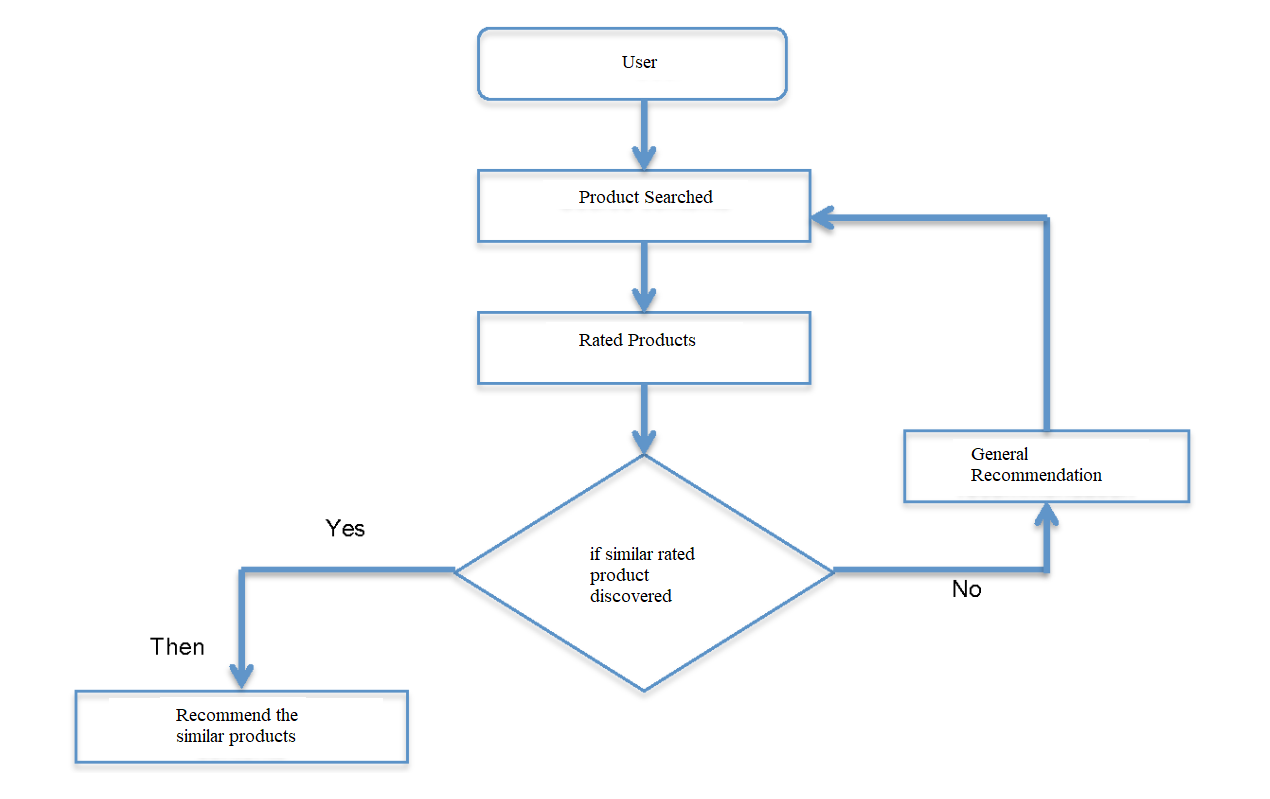

Collaborative Filtering:

Collaborative Filtering using Cosine Similarity:
1. Preparing data from dataset: Reading from the dataset in 3 different dataframe. Checking the null values, and duplicated value in dataset. Merging two customers and products, from ratings dataset based on the productID which renamed from product_id. Finding the popular products based on the rating provided by the user and counting the total rating for a particular product and also the average rating for the product.

2. Similarity Calculation:
•	Calculate the cosine similarity between users or items based on the user-item interaction pivot table based on user rating for a particular product by a user.
3. Training Process:
•	There's no traditional training process or epochs in collaborative filtering using cosine similarity. The similarity matrix is calculated directly from the user-item interaction data.
4. Convergence Criteria:
•	Since there's no iterative optimization involved, there's no convergence criterion like in gradient-based training algorithms.


In [ ]:
#code here

**Project Technology, material ** : We used collaborate filtering system for doning this project. Collaborative filtering system means to filter data from user reviews to make personalized recommendations. And here we use python programming language and uses of some libraries of python which are used for data handaling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Libraries :** Here import some libraries named pandas, numpy and matplotlib.Pandas is used for working with data sets. NumPy is used to perform a wide variety of mathematical operations on arrays in here. And for animated used matplotlib library.After import these, we import data from google drive which are used for this  system.

In [ ]:
products = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Project/Dataset_new/products.json')
customers = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Project/Dataset_new/customers.json')
ratings = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Project/Dataset_new/ratings.json')

**Variables for files:** Firstly, we are taked three variables named product, customer and rating which contain three files respectably product.json, customer.json and ratings.json. All of these files are collected from our drive.

**Head of products :** Here we have print the head of product .After printing this head we show that there are three columns are showed.And comlumn of Id is increasing sequencly. And there are various desktop product brands are here and their price is also given.

In [ ]:
products.head()

,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0


**Head of customer :** in here we see two columns for customer file named as Id and Nickname. The ids are created randomly.

In [ ]:
customers.head()

,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen


**Head of ratings :** In rating variable contains a json file which are contains four colmns named Customer Id, ProductId, Rate and CreateDate. Here we see the rating value and when a customer given rating for products that time is also recorded.

In [ ]:
ratings.head()

,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


**Shape of files**:  Using shape keyword we can find the total row and colmn number of a files. Here after using this, we find 691 rows and 3 columns for products , 130754 rows and 4 columns for rating ,678 rows and 2 columns for customers variable. We find 678 customers but we also find 130754 reviws from them about only 691 products.

In [ ]:
print(products.shape)
print(ratings.shape)
print(customers.shape)

(691, 3)
(130754, 4)
(678, 2)


In [ ]:
#missing row info
products.isnull().sum()

NameError: ignored

In [ ]:
customers.isnull().sum()

Id          0
NickName    0
dtype: int64

In [ ]:
ratings.isnull().sum()

CustomerID    0
ProductID     0
Rate          0
CreateDate    0
dtype: int64

**Null and duplicate data** : Using isNull and duplicate function, we see that there are any null variables and duplicate variable are placed in our files. But we do not find any duplicate variables for any group group of data and there are no null values in these files.

In [ ]:
print(products.duplicated().sum())
print(ratings.duplicated().sum())
print(customers.duplicated().sum())

0
0
0


In [ ]:
products.rename(columns = {'Id':'ProductID'}, inplace = True)

### Popularity Based System

#### minimum 250 rating then recommned with highest avg rating  

Demo: [Popularity-based link](https://cse366.onrender.com/popularity-based)


**Customer and rating **: Here we take a new variale named ratings with name. In this variable we take that which customer gives rating to which product. And here we print the full rating file with customers id.   

In [ ]:
ratings_with_name = ratings.merge(products, on='ProductID')

In [ ]:
ratings_with_name

**Rating number of product:** In this section we print which product earn how much rating and we print this information with total number of rating earn and all of the product. From this data we can find the maximum rating earn data. So we can say that which data is get most rating, that is the most popular product.

In [ ]:
ratings_with_name.groupby('Name').count()['Rate']

**Change column name or Rate :** Here we create a new variable named num_rating_df which contains the whole product list with getting all of their total rating.And replace the rate column by num-rating for creating a new dataset which contains sequence number, product number and total number of raing for each product.

In [ ]:
num_rating_df = ratings_with_name.groupby('Name').count()['Rate'].reset_index()
num_rating_df.rename(columns={'Rate': 'nums-ratings'}, inplace=True)
num_rating_df

**Average Rating :** Now we create a new variable named avg_rating_df. This variable stores the product average rating gain. From creating this variable we collect information form ratings_with_name variable. After that we can understand how much customer are given rating to a product and their average rate per product.

In [ ]:
# printing the avg rating
avg_rating_df = ratings_with_name.groupby('Name').mean()['Rate'].reset_index()
avg_rating_df.rename(columns={'Rate': 'avg-ratings'}, inplace=True)
avg_rating_df

## **Exploratory Data Analysis**

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(avg_rating_df['avg-ratings'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.grid(True)
plt.show()

**Histogram : ** Now we print a histogram based on average rating of per product. In this histogram is shown that the maximum times  around 3.2 rating are earned for all of the product.

In [ ]:
#merging two dataframe
popular_df = num_rating_df.merge(avg_rating_df, on='Name')
popular_df

  **Average rating and nums-rating **: Now print total number rating per product and average rating of each product by merging two dataframe.

**Scatter plot** : Here create a scatter plot using average rating and total number of rating of per product. Here maximumn products earn below 200 rating and only one product earn 400 rating.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(popular_df['avg-ratings'], popular_df['nums-ratings'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.title('Relationship Between Rating and Rating Count')
plt.grid(True)
plt.show()


**Sort product:**Now sort the product according to average rating. Which product gets maximumn rating but not average rating is high, those are in the below. And which product is stay on top these are more quality full product from which are on bottom those are quality less product.

In [ ]:
#logic
#products having rating >= 50 in total
#top 50 products, sort based on avg rating

popular_df = popular_df[popular_df['nums-ratings'] >= 50].sort_values('avg-ratings', ascending=False).head(50)
popular_df

**Merge product** : Now merges it with the products DataFrame based on the Name column, removes duplicates based on the Name column, and then selects only the columns Name, nums-ratings, and avg-ratings in the resulting DataFrame. The modified DataFrame is then stored back in the popular_df variable.

In [ ]:
popular_df = popular_df.merge(products, on='Name').drop_duplicates('Name')[['Name','nums-ratings', 'avg-ratings']]
popular_df

In [ ]:
#DONE

### Collabrative Filtering Rating Based Product Recommnedation


In [ ]:
customers.rename(columns = {'Id':'CustomerID'}, inplace = True)

**Replace custmerId by id** : CustomerID replace by Id and then calculates the count of ratings provided by each customer in the ratings_with_name DataFrame. The result will be a Series with CustomerID as the index and the count of ratings as values.

In [ ]:
ratings_with_name.groupby('CustomerID').count()['Rate']

CustomerID
3          159
6          538
13874      561
13879      389
13885      103
          ... 
103988     387
103991     247
103992     140
103996    1427
103997     289
Name: Rate, Length: 344, dtype: int64

**Rated Users with minimum 200 rate:** Finding the user who have at least rated 200 products, these user retrive from the notrated dataset and finding there indexs.

In [ ]:
notRated = ratings_with_name.groupby('CustomerID').count()['Rate'] > 200
rated_user = notRated[notRated].index
rated_user

Int64Index([     6,  13874,  13879,  14180,  14902,  14906,  15018,  15042,
             15202,  22881,
            ...
            103971, 103972, 103977, 103982, 103985, 103987, 103988, 103991,
            103996, 103997],
           dtype='int64', name='CustomerID', length=250)

**Rated user** : Rated_user will contain a list of CustomerID' values for customers who have rated more than 200 items. This can be useful for further analysis or targeting specific customer on dataset who are highly active in providing ratings.

In [ ]:
rated_user.size

250

In [ ]:
ratings_with_name

,CustomerID,ProductID,Rate,CreateDate,Name,UnitPrice
0,103416,619,1,2018/01/01 01:36:30,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
1,103401,619,4,2018/01/05 14:36:40,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
2,103491,619,1,2018/01/15 19:36:29,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
3,103856,619,4,2018/01/16 07:37:25,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
4,103320,619,4,2018/01/29 09:36:28,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
...,...,...,...,...,...,...
130749,103890,236,4,2022/03/01 12:58:19,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130750,103587,236,4,2022/03/05 14:56:46,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130751,103970,236,3,2022/03/06 17:46:03,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130752,103541,236,3,2022/03/07 15:58:41,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0


**Filtering:**

Previously we got our rated user and stored into rated_user list. Now, we are going to filter out the products that is rated by the these user by checking CustomerID and storing filter_rating

In [ ]:
filter_rating = ratings_with_name[ratings_with_name['CustomerID'].isin(rated_user)]
filter_rating[ratings_with_name['CustomerID'].isin(rated_user)]
filter_rating

<ipython-input-48-9d32bfd70049>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_rating[ratings_with_name['CustomerID'].isin(rated_user)]


,CustomerID,ProductID,Rate,CreateDate,Name,UnitPrice
0,103416,619,1,2018/01/01 01:36:30,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
1,103401,619,4,2018/01/05 14:36:40,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
2,103491,619,1,2018/01/15 19:36:29,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
4,103320,619,4,2018/01/29 09:36:28,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
5,22881,619,4,2018/02/10 21:37:56,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
...,...,...,...,...,...,...
130749,103890,236,4,2022/03/01 12:58:19,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130750,103587,236,4,2022/03/05 14:56:46,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130751,103970,236,3,2022/03/06 17:46:03,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130752,103541,236,3,2022/03/07 15:58:41,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0


**Famous Products:** from the filter_rating product now we are calculating the total rating of a particular product having at least rated by 50 user.

In [ ]:
y = filter_rating.groupby('Name').count()['Rate']>= 50
famous_products= y[y].index
famous_products

Index(['"Love" Necklace 14K Yellow Gold 16" to 18" Adjustable',
       '$100 Physical Gift Card', '$25 Virtual Gift Card',
       '$50 Physical Gift Card', '1/10 Carat t.w. Diamond Promise Ring',
       '1/20 Carat t.w. Black and white Diamond Promise Ring',
       '1/6 Ct. tw Diamond Initials Couple's Heart Necklace',
       '1/8 Ct. tw Diamond Nameplate Heart Necklace',
       '16" Adjustable Rope Chain 14K Yellow Gold Appx. 1.2mm',
       '3-Stone Promise Ring 1/6 ct tw Diamonds Sterling Silver',
       ...
       'Đầm Suông B&Y', 'Ống Hút Kim Loại Bằng Thép Không Gỉ',
       'Ống hút cỏ bàng khô - Hộp 500 ống', 'Ống hút giấy',
       'Ống hút giấy - copy', 'Ống hút gạo OCHAO 500 Gram', 'Ống hút inox',
       'Ống hút kim loại', 'Ống hút tre', '레드슈즈'],
      dtype='object', name='Name', length=625)

In [ ]:
famous_products.size

625

Again filtering the final product for the system which are going to recommend to the users

In [ ]:
final_ratings = filter_rating[filter_rating['Name'].isin(famous_products)]
# final_ratings.drop_duplicates()
final_ratings

,CustomerID,ProductID,Rate,CreateDate,Name,UnitPrice
0,103416,619,1,2018/01/01 01:36:30,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
1,103401,619,4,2018/01/05 14:36:40,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
2,103491,619,1,2018/01/15 19:36:29,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
4,103320,619,4,2018/01/29 09:36:28,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
5,22881,619,4,2018/02/10 21:37:56,Le Vian Chocolate Diamonds 1/4 ct tw Earrings ...,1049.0
...,...,...,...,...,...,...
130749,103890,236,4,2022/03/01 12:58:19,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130750,103587,236,4,2022/03/05 14:56:46,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130751,103970,236,3,2022/03/06 17:46:03,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0
130752,103541,236,3,2022/03/07 15:58:41,Black & White Diamond Promise Ring 1/6 ct tw S...,219.0


Converting the final products details and rating into pivot table.
The columns will represtent the customer id and and the index will retpresent the products name value will be based on Rate givent by the columns users.

In [ ]:
pt = final_ratings.pivot_table(index='Name', columns='CustomerID', values='Rate')
pt

CustomerID,6,13874,13879,14180,14902,14906,15018,15042,15202,22881,...,103971,103972,103977,103982,103985,103987,103988,103991,103996,103997
Name,,,,,,,,,,,,,,,,,,,,,
"""Love"" Necklace 14K Yellow Gold 16"" to 18"" Adjustable",1.0,5.0,2.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,4.000000,NaN
$100 Physical Gift Card,1.0,4.0,NaN,NaN,1.0,4.0,4.0,NaN,NaN,5.000000,...,5.0,5.0,NaN,5.000000,NaN,NaN,5.0,5.0,3.666667,NaN
$25 Virtual Gift Card,NaN,4.5,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.000000,...,5.0,NaN,NaN,5.000000,1.0,5.0,5.0,NaN,4.500000,1.0
$50 Physical Gift Card,1.0,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.333333,...,NaN,5.0,NaN,NaN,1.0,5.0,NaN,NaN,3.600000,NaN
1/10 Carat t.w. Diamond Promise Ring,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,4.000000,...,5.0,5.0,NaN,5.000000,NaN,5.0,NaN,NaN,3.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ống hút gạo OCHAO 500 Gram,1.0,NaN,2.0,4.0,NaN,NaN,4.0,5.0,NaN,4.000000,...,5.0,NaN,NaN,4.000000,1.0,NaN,NaN,5.0,4.000000,NaN
Ống hút inox,1.0,4.0,NaN,4.0,1.0,4.0,NaN,3.0,1.0,3.200000,...,NaN,3.0,NaN,4.666667,NaN,5.0,NaN,NaN,3.666667,1.0
Ống hút kim loại,NaN,5.0,5.0,NaN,1.0,NaN,NaN,3.5,1.0,2.333333,...,5.0,1.0,5.0,5.000000,1.0,1.0,NaN,NaN,3.666667,NaN


Replacing the null ratings

In [ ]:
pt.fillna(0, inplace=True)
pt

CustomerID,6,13874,13879,14180,14902,14906,15018,15042,15202,22881,...,103971,103972,103977,103982,103985,103987,103988,103991,103996,103997
Name,,,,,,,,,,,,,,,,,,,,,
"""Love"" Necklace 14K Yellow Gold 16"" to 18"" Adjustable",1.0,5.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.000000,...,0.0,5.0,0.0,0.000000,0.0,0.0,5.0,0.0,4.000000,0.0
$100 Physical Gift Card,1.0,4.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,5.000000,...,5.0,5.0,0.0,5.000000,0.0,0.0,5.0,5.0,3.666667,0.0
$25 Virtual Gift Card,0.0,4.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.000000,...,5.0,0.0,0.0,5.000000,1.0,5.0,5.0,0.0,4.500000,1.0
$50 Physical Gift Card,1.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.333333,...,0.0,5.0,0.0,0.000000,1.0,5.0,0.0,0.0,3.600000,0.0
1/10 Carat t.w. Diamond Promise Ring,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,4.000000,...,5.0,5.0,0.0,5.000000,0.0,5.0,0.0,0.0,3.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ống hút gạo OCHAO 500 Gram,1.0,0.0,2.0,4.0,0.0,0.0,4.0,5.0,0.0,4.000000,...,5.0,0.0,0.0,4.000000,1.0,0.0,0.0,5.0,4.000000,0.0
Ống hút inox,1.0,4.0,0.0,4.0,1.0,4.0,0.0,3.0,1.0,3.200000,...,0.0,3.0,0.0,4.666667,0.0,5.0,0.0,0.0,3.666667,1.0
Ống hút kim loại,0.0,5.0,5.0,0.0,1.0,0.0,0.0,3.5,1.0,2.333333,...,5.0,1.0,5.0,5.000000,1.0,1.0,0.0,0.0,3.666667,0.0


In [ ]:
#distance calculation
#each products becomes vector and we will calculate the eulicaten distance

from sklearn.metrics.pairwise import cosine_similarity

From the pivot table, we need to convert into cosine similary socres, that is calculating how similar a proudct with another

In [ ]:
#distance (similarity score)
sim_score = cosine_similarity(pt)
sim_score

array([[1.        , 0.61348343, 0.53541558, ..., 0.55868415, 0.51042143,
        0.5056698 ],
       [0.61348343, 1.        , 0.60133637, ..., 0.58886603, 0.62694099,
        0.56969447],
       [0.53541558, 0.60133637, 1.        , ..., 0.56109151, 0.56038688,
        0.51936784],
       ...,
       [0.55868415, 0.58886603, 0.56109151, ..., 1.        , 0.54018535,
        0.58313626],
       [0.51042143, 0.62694099, 0.56038688, ..., 0.54018535, 1.        ,
        0.60190701],
       [0.5056698 , 0.56969447, 0.51936784, ..., 0.58313626, 0.60190701,
        1.        ]])

Based on the similary score match the system will suggest prouduct to the user based on their search

In [ ]:
def recProduct(name):
    #index fetch of the particular products
    index = np.where(pt.index == name)[0][0]
    #removed the 0th products which same book, so from 1 to 6 total 5 products
    similar_products = sorted(list(enumerate(sim_score[index])), key=lambda x:x[1], reverse=True)[1:6] #sorted based on similarity score

    print('Recommned products you may like: ')
    for i in similar_products:
        print(pt.index[i[0]]) #index print

In [ ]:
recProduct(input('Enter your product name: '))

In [ ]:
#end of model

## **Results and Discussion**

The main findings of the project are as follows:
*	Collaborative filtering and content-based based on cosine similarity are both effective techniques for product recommendation.
*	Collaborative filtering is more effective for recommending products that are like products that the user has already rated highly.
*	Content-based cosine similarity is more effective over collaborative filtering model for recommending products that are similar to products that the user has searched for or browsed.
*	The performance of both techniques can be improved by using a larger dataset of user ratings and a more diverse set of features to represent products.

The challenges faced during the project were as follows:
*	Finding the actual dataset over the internet.
*	Obtaining a large enough dataset of user ratings was difficult.
*	Representing products in a way that is both accurate and efficient was challenging.

The challenges were overcome by:
*	Using a dataset of user ratings from an existing Kaggle website.
*	Representing products using a variety of features, such as the product's title, description, and reviews.


## **Conclusion**


In conclusion, this project has successfully developed a product recommendation system using both collaborative filtering and content-based based on cosine similarity. The system can recommend products that users are likely to be interested in, and it has been shown to be effective result. The system could be further improved by using a larger dataset of user ratings and a more diverse set of features to represent products. However, we can improve the accuracy of product recommendation systems by updating our algorithm and large dataset to train the model.

Here are the project's contributions to solving the problem of product recommendation:
*	The project has developed two product recommendation system that is both accurate and efficient.
*	The project has shown that collaborative filtering and content-based cosine similarity are both effective techniques for product recommendation.
*	The project has identified the challenges and limitations of the current system and proposed directions for future research by using deep learning model.

Future improvements for further research:
*	The system could be further improved by using a larger dataset of user ratings and a more diverse set of features to represent products.
*	The system could be extended to recommend products to users based on their social network connections.
*	The system could be integrated with other recommendation systems, such as those for movies and music, to provide a more comprehensive recommendation experience.


## **Demo**

![image.png](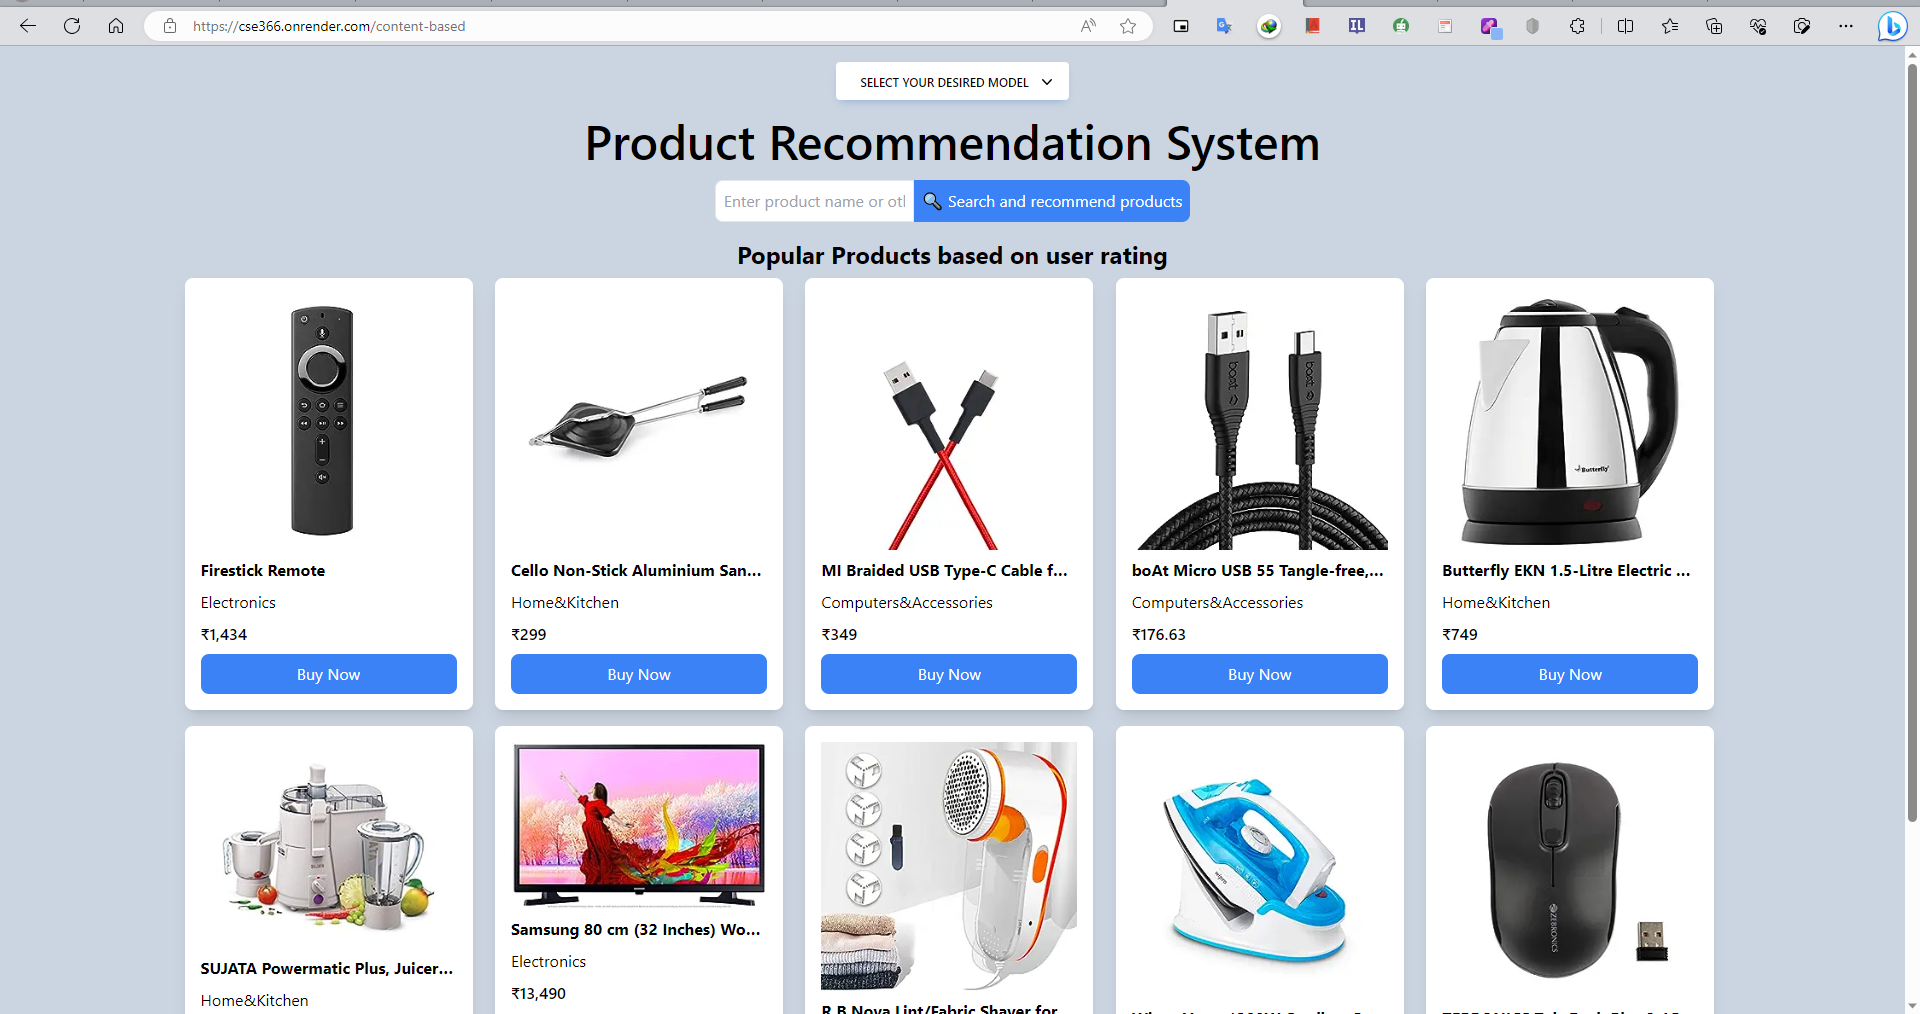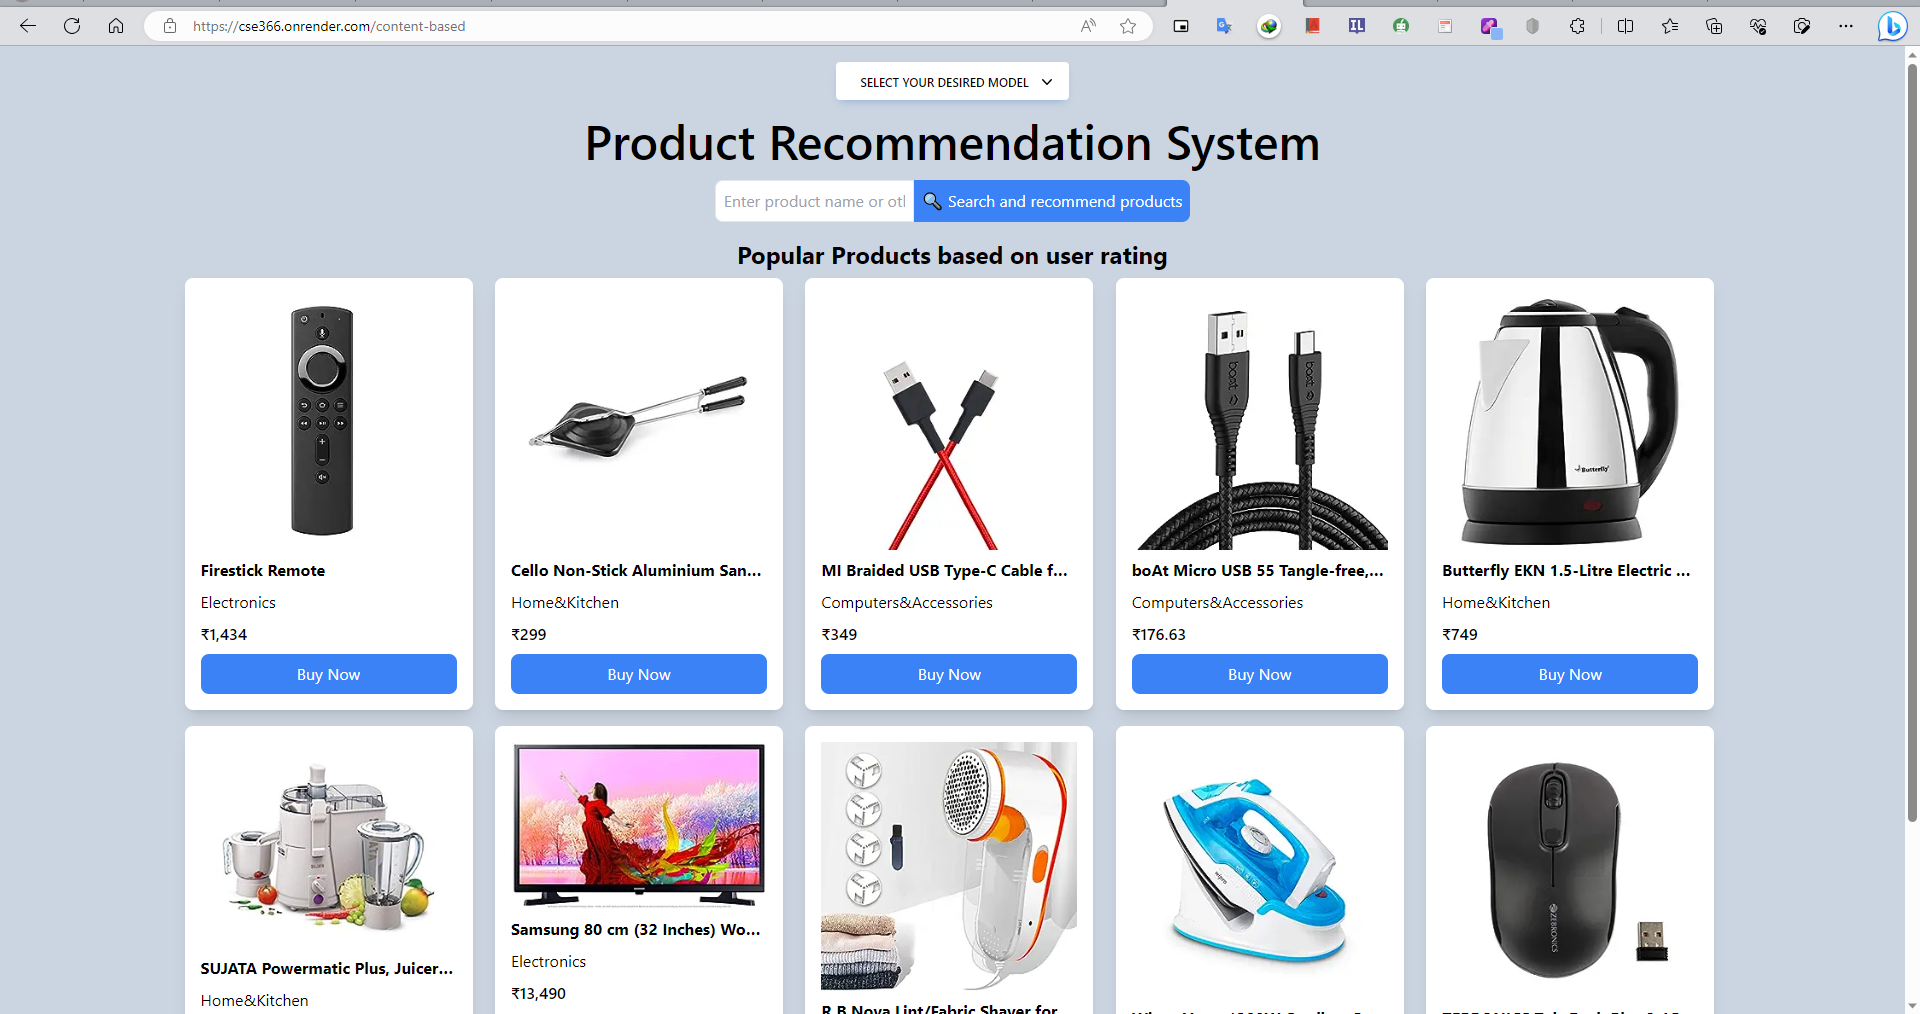)

## **References**

Amazon Sales Dataset: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset


Amazon Sales Dataset: https://www.kaggle.com/datasets/trnduythanhkhttt/uelstoredataset

Libraries used in the project:
1. Pandas
2. Numpy
3. Matplotlib
4. sklearn


## **Code Repository**
Web Interface build using:
* Flask
* HTML and Tailwind CSS

Hosted live demo: https://cse366.onrender.com/

Github: https://github.com/SagarKarmoker/CSE366

Github (Notebooks): https://github.com/SagarKarmoker/CSE366/NoteBooks




## **Acknowledgments**

This project is completed under the guidence of:

Dr. Md Rifat Ahmmad Rashid

Assistant Professor,

Department of Computer Science & Engineering,

East West University, Dhaka

We can express enough thanks to Dr. Md Rifat Ahmmad Rashid Sir, for his continued support and encouragement. We offer our sincere appreciation for the learning opportunities provided by our course instructor.
Our completion of this paper could not have been accomplished without the information provided . We sincerely  him for helping the information available.


## **Student Details**

Submitted By:
1. Sagar Karmoker (ID: 2020-2-60-054)
2. Hossain Sheikh (ID: 2020-1-60-201)
3. Abu Salah Rafi (ID: 2020-1-60-136)
